In [14]:
!pip install kaggle

In [15]:
import os
import json

# Specify the path to your kaggle.json file
kaggle_json_path = 'kaggle.json'

# Load the kaggle.json file
with open(kaggle_json_path, 'r') as file:
    kaggle_creds = json.load(file)

# Create the necessary directory to store kaggle.json
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

# Move the kaggle.json file to the ~/.kaggle directory
with open(os.path.expanduser('~/.kaggle/kaggle.json'), 'w') as file:
    json.dump(kaggle_creds, file)

# Set the appropriate permissions
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)

# Verify the setup by checking your Kaggle datasets
!kaggle datasets list


ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
steve1215rogg/student-lifestyle-dataset                      student lifestyle dataset                           22KB  2024-11-11 19:11:28           1457         34  1.0              
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset       11KB  2024-09-28 20:21:12          25234        500  1.0              
muhammadroshaanriaz/students-performance-dataset-cleaned     Students Performance | Clean Dataset                10KB  2024-10-29 19:32:26           4373         79  1.0              
aadyasingh55/impact-of-social-media-on-suicide-rates         Impact of social me

**Downloading Dataset**


In [16]:
!kaggle datasets download -d uzairkhan45/breast-cancer-patients-mris --force


Dataset URL: https://www.kaggle.com/datasets/uzairkhan45/breast-cancer-patients-mris
License(s): CC0-1.0




  0%|          | 0.00/56.9M [00:00<?, ?B/s]
  2%|1         | 1.00M/56.9M [00:00<00:44, 1.31MB/s]
  4%|3         | 2.00M/56.9M [00:00<00:23, 2.46MB/s]
  9%|8         | 5.00M/56.9M [00:01<00:07, 6.97MB/s]
 16%|#5        | 9.00M/56.9M [00:01<00:06, 8.09MB/s]
 23%|##2       | 13.0M/56.9M [00:01<00:03, 12.5MB/s]
 26%|##6       | 15.0M/56.9M [00:01<00:04, 10.9MB/s]
 32%|###1      | 18.0M/56.9M [00:02<00:02, 13.9MB/s]
 37%|###6      | 21.0M/56.9M [00:02<00:02, 16.8MB/s]
 44%|####3     | 25.0M/56.9M [00:02<00:01, 21.0MB/s]
 49%|####9     | 28.0M/56.9M [00:02<00:01, 22.2MB/s]
 56%|#####6    | 32.0M/56.9M [00:02<00:01, 26.0MB/s]
 62%|######1   | 35.0M/56.9M [00:02<00:00, 25.7MB/s]
 69%|######8   | 39.0M/56.9M [00:02<00:00, 28.9MB/s]
 74%|#######3  | 42.0M/56.9M [00:03<00:00, 18.8MB/s]
 79%|#######9  | 45.0M/56.9M [00:03<00:00, 15.7MB/s]
 86%|########6 | 49.0M/56.9M [00:03<00:00, 19.3MB/s]
 91%|#########1| 52.0M/56.9M [00:03<00:00, 20.2MB/s]
 98%|#########8| 56.0M/56.9M [00:03<00:00, 22.8MB/s]
1

In [17]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/breast-cancer-patients-mris.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

FileNotFoundError: [Errno 2] No such file or directory: '/content/breast-cancer-patients-mris.zip'

In [18]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


**Impoerting Dependancies**

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split


In [20]:
# Doğru dosya yolu
train_h = os.listdir('C:/Users/ibrah/PycharmProjects/breastCancer/BreastCancerPatientsMRI/train/Healthy')
print(train_h[:5])  # İlk 5 dosyayı yazdır

['H_1.jpg', 'H_10.jpg', 'H_100.jpg', 'H_101.jpg', 'H_102.jpg']


In [21]:
# Doğru dosya yolu
train_s = os.listdir('C:/Users/ibrah/PycharmProjects/breastCancer/BreastCancerPatientsMRI/train/Sick')
print(train_h[:5])  # İlk 5 dosyayı yazdır

['H_1.jpg', 'H_10.jpg', 'H_100.jpg', 'H_101.jpg', 'H_102.jpg']


In [22]:

# Görüntülerin sayısını yazdır
print('Number of healthy images:', len(train_h))
print('Number of sick images:', len(train_s))

Number of healthy images: 700
Number of sick images: 700


**Making 2 classes out of the data**

Has cancer  -->  1

Doesn't have Cancer  -->  0

In [23]:
#create the labels
train_h_labels = [1]*700
train_s_labels = [0]*700

In [24]:
print(train_h_labels[:5])
print(train_s_labels[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [25]:
labels = train_h_labels + train_s_labels
print(labels[:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**displaying the images**


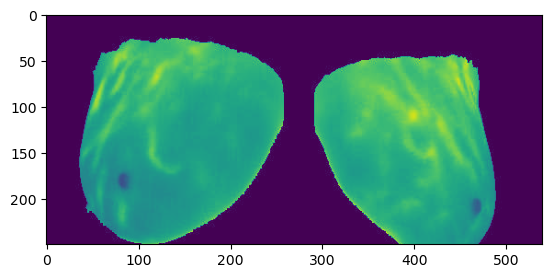

In [26]:
#disply with mask image
img = mpimg.imread(r'C:/Users/ibrah/PycharmProjects/breastCancer/BreastCancerPatientsMRI/train/Healthy/H_607.jpg')

plt.imshow(img)

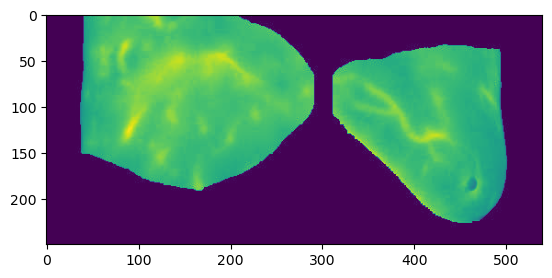

In [27]:
#disply with mask image
img = mpimg.imread(r'C:/Users/ibrah/PycharmProjects/breastCancer/BreastCancerPatientsMRI/train/Sick/S_626.jpg')

plt.imshow(img)

**Image processing**

1- Resize the images

2- Convert the images to numpy arrays


In [28]:
# convert images to numpy arrays+

train_h_path = r'C:/Users/ibrah/PycharmProjects/breastCancer/BreastCancerPatientsMRI/train/Healthy/'

data = []

for img_file in train_h:

  image = Image.open(train_h_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



train_s_path =  r'C:/Users/ibrah/PycharmProjects/breastCancer/BreastCancerPatientsMRI/train/Sick/'


for img_file in train_s:

  image = Image.open(train_s_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [29]:
type(data)

list

In [30]:
len(data)

1400

In [31]:
data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [32]:
#convert image list and label list into numpy arrays
X = np.array(data)
Y = np.array(labels)

In [33]:
type(X)
type(Y)

numpy.ndarray

In [34]:
print(X.shape)
print(Y.shape)

(1400, 128, 128, 3)
(1400,)


**Train_Test_Split**

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [36]:
print (X.shape, X_train.shape, X_test.shape)

(1400, 128, 128, 3) (1120, 128, 128, 3) (280, 128, 128, 3)


In [37]:
#scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [38]:
X_train_scaled[3]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

**Building a convolutional neuralnetwork**

In [39]:
import tensorflow as tf
import keras
from keras import regularizers

num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Flatten())

# Making a regularization to decresae the overfitting
model.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.003)))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.003)))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

C:\Users\ibrah\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
#compile the neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [41]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs = 20)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - acc: 0.5219 - loss: 2.3511 - val_acc: 0.6786 - val_loss: 1.2822
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - acc: 0.6765 - loss: 1.1919 - val_acc: 0.7857 - val_loss: 0.9384
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 176ms/step - acc: 0.8029 - loss: 0.9157 - val_acc: 0.8482 - val_loss: 0.7442
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - acc: 0.8864 - loss: 0.6976 - val_acc: 0.8750 - val_loss: 0.6442
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 176ms/step - acc: 0.9212 - loss: 0.5849 - val_acc: 0.9107 - val_loss: 0.5533
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - acc: 0.9365 - loss: 0.4969 - val_acc: 0.9107 - val_loss: 0.5020
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - acc: 0.9471 - loss: 0.4481 - val_acc: 0.9196 - val_loss: 0.4708
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - acc: 0.9507 - loss: 0.4190 - val_acc: 0.9375 - val_loss: 0.4721
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - ac

**Final Accuracy For Test Data**

In [42]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - acc: 0.9601 - loss: 0.3493
Test Accuracy = 0.9678571224212646


**Illustrating Loss & Accuracy**

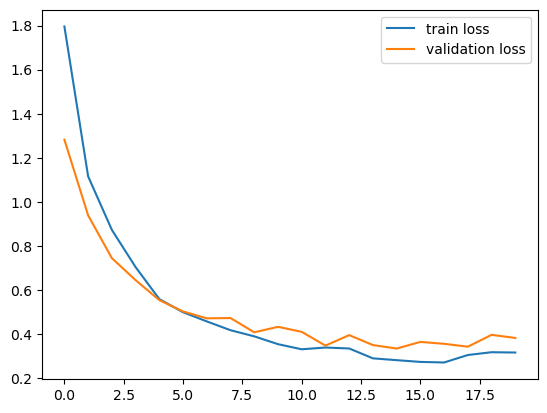

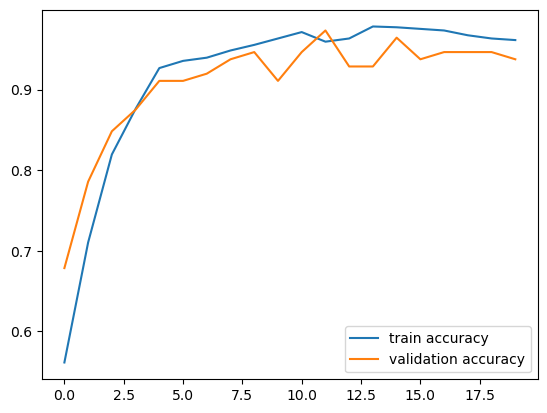

In [43]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Buildnig Predictive System**

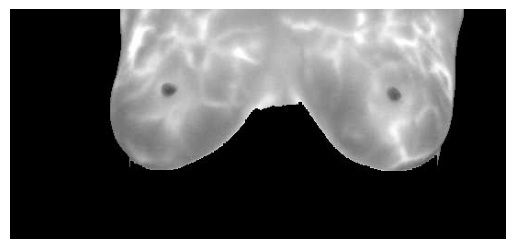

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[0.00673729 0.9857448 ]]
1
The person does not have cancer


In [44]:
import matplotlib.pyplot as plt
import cv2

input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

# OpenCV görselleri BGR formatında okur, bunu RGB'ye çevirelim
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Görseli matplotlib ile göster
plt.imshow(input_image_rgb)
plt.axis('off')  # Ekseni gizle
plt.show()

input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
    print('The person does not have cancer')
else:
    print('The person has cancer')
